## License Plate Recognition Using Roboflow License Plate Detection and easyOCR for License Plate OCR.

In [18]:
pip install inference-sdk

In [37]:
import easyocr
import cv2
import matplotlib.pyplot as plt
from inference_sdk import InferenceHTTPClient
from PIL import Image
import numpy as np
import re


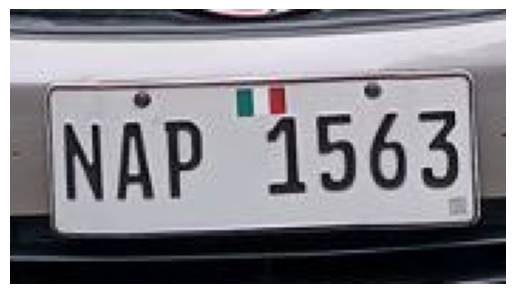

In [20]:


# Initialize the client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="IJgd8jCLHIdJE3mNjMvJ"
)

# Send the image for inference
result = CLIENT.infer('test.jpg', model_id="license-plate-recognition-rxg4e/4")

# Load the image
image_path = 'test.jpg'
image = Image.open(image_path)

# Check if any predictions were made
if len(result['predictions']) > 0:
    # Assuming the first prediction is the license plate
    prediction = result['predictions'][0]

    # Extract bounding box coordinates
    x = prediction['x']
    y = prediction['y']
    width = prediction['width']
    height = prediction['height']

    # Calculate box coordinates for cropping
    left = int(x - width / 2)
    top = int(y - height / 2)
    right = int(x + width / 2)
    bottom = int(y + height / 2)

    # Crop the image to the bounding box
    cropped_image = image.crop((left, top, right, bottom))

    # Use matplotlib to display the image
    plt.imshow(cropped_image)
    plt.axis('off')  # Hide axes
    plt.show()

    # Optionally save the cropped image
    cropped_image.save("cropped_license_plate.jpg")
else:
    print("No license plate detected.")


In [21]:
!pip install easyocr

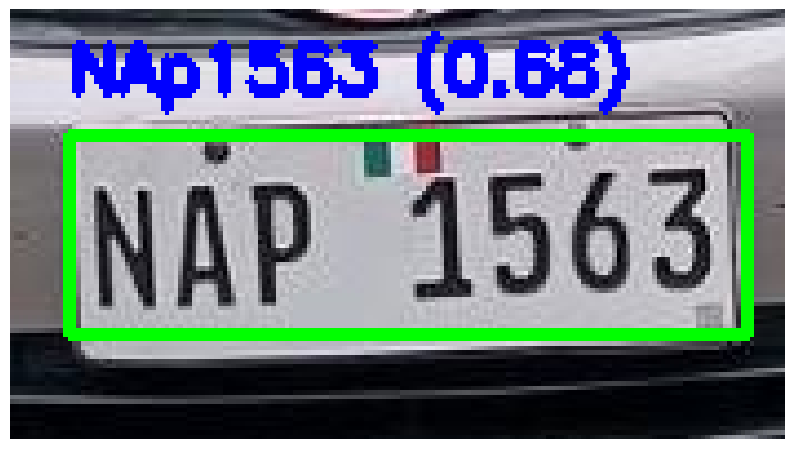

Detected Alphanumeric Text: NAp1563, Confidence: 0.68, Bounding Box: [[13, 28], [166, 28], [166, 73], [13, 73]]


In [38]:
# Load your cropped image
license_image = cv2.imread('/content/cropped_license_plate.jpg')

# Initialize the EasyOCR reader (specify the language, e.g., 'en' for English)
reader = easyocr.Reader(['en'])

# Perform OCR on the image directly without unnecessary color conversions
result = reader.readtext(license_image)

# Draw bounding boxes, text, and confidence scores on the original image
for (bbox, text, prob) in result:
    # Filter the text to keep only alphanumeric characters
    text = re.sub(r'[^A-Za-z0-9]', '', text)

    # Get the coordinates of the bounding box
    top_left = tuple([int(val) for val in bbox[0]])
    bottom_right = tuple([int(val) for val in bbox[2]])

    # Draw the bounding box
    cv2.rectangle(license_image, top_left, bottom_right, (0, 255, 0), 2)

    # Prepare the label with filtered text and confidence score
    label = f"{text} ({prob:.2f})"

    # Put the detected text and confidence on the image
    cv2.putText(license_image, label, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Use matplotlib to display the original BGR image without extra conversions
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Convert to RGB just for displaying in matplotlib
plt.axis('off')  # Turn off axis labels
plt.show()

# Print out the detected alphanumeric text, bounding box coordinates, and confidence level
for (bbox, text, prob) in result:
    # Filter the text to keep only alphanumeric characters for display
    text = re.sub(r'[^A-Za-z0-9]', '', text)
    print(f"Detected Alphanumeric Text: {text}, Confidence: {prob:.2f}, Bounding Box: {bbox}")

True

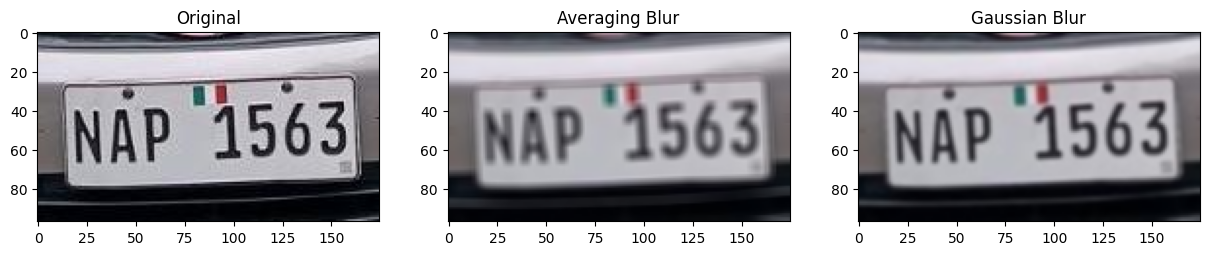

In [23]:
# Image Smoothing Techniques
# Load image
image = cv2.imread('cropped_license_plate.jpg')

# Convert the image from BGR (OpenCV default) to RGB (for Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Averaging filter
blur_avg = cv2.blur(image_rgb, (5, 5))

# Apply Gaussian filter
blur_gaussian = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Display the images using Matplotlib
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original')

# Averaging Blur
plt.subplot(1, 3, 2)
plt.imshow(blur_avg)
plt.title('Averaging Blur')

# Gaussian Blur
plt.subplot(1, 3, 3)
plt.imshow(blur_gaussian)
plt.title('Gaussian Blur')

cv2.imwrite('averaging_blur.jpg', blur_avg)
cv2.imwrite('gaussian_blur.jpg', blur_gaussian)

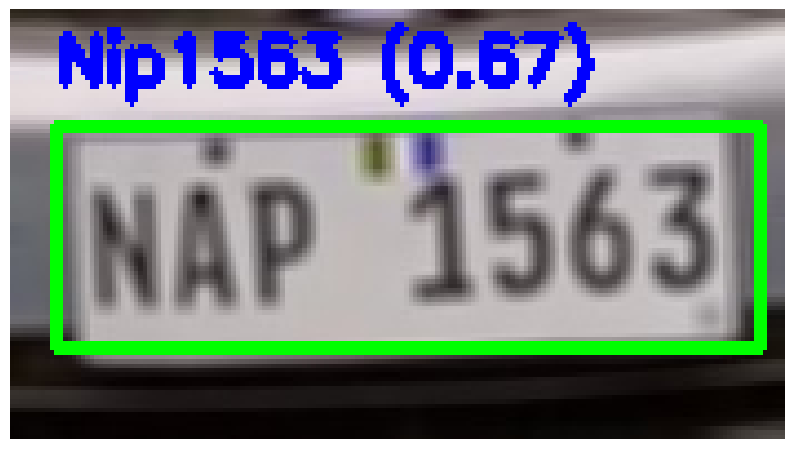

Detected Alphanumeric Text: Nip1563, Confidence: 0.67, Bounding Box: [[10, 26], [169, 26], [169, 76], [10, 76]]


In [39]:
# Load your cropped image
license_image = cv2.imread('averaging_blur.jpg')

# Initialize the EasyOCR reader (specify the language, e.g., 'en' for English)
reader = easyocr.Reader(['en'])

# Perform OCR on the image directly without unnecessary color conversions
result = reader.readtext(license_image)

# Use matplotlib to display the image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Convert to RGB just for displaying in matplotlib
plt.axis('off')  # Turn off axis labels

# Check if any text was detected
if len(result) == 0:
    print("No text detected in the image.")
else:
    # Draw bounding boxes, text, and confidence scores on the original image
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters
        text = re.sub(r'[^A-Za-z0-9]', '', text)

        # Get the coordinates of the bounding box
        top_left = tuple([int(val) for val in bbox[0]])
        bottom_right = tuple([int(val) for val in bbox[2]])

        # Draw the bounding box
        cv2.rectangle(license_image, top_left, bottom_right, (0, 255, 0), 2)

        # Prepare the label with filtered text and confidence score
        label = f"{text} ({prob:.2f})"

        # Put the detected text and confidence on the image
        cv2.putText(license_image, label, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the updated image with bounding boxes and labels
    plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Update image display after drawing on it

plt.show()

# Print out the detected alphanumeric text, bounding box coordinates, and confidence level if any text is detected
if len(result) > 0:
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters for display
        text = re.sub(r'[^A-Za-z0-9]', '', text)
        print(f"Detected Alphanumeric Text: {text}, Confidence: {prob:.2f}, Bounding Box: {bbox}")


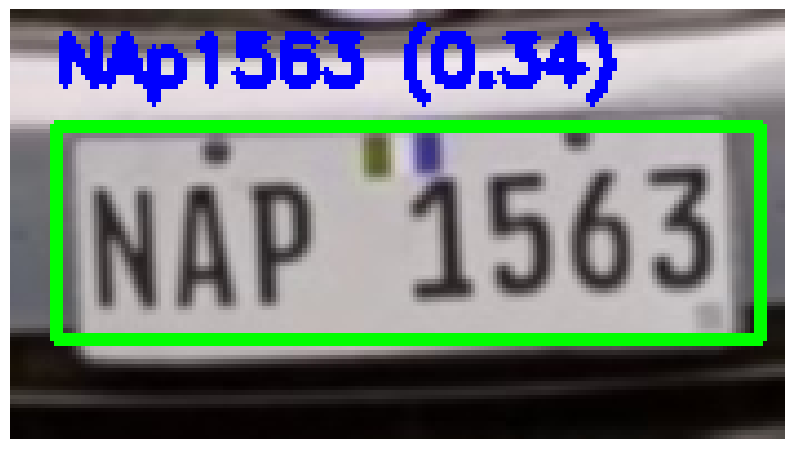

Detected Alphanumeric Text: NAp1563, Confidence: 0.34, Bounding Box: [[10, 26], [169, 26], [169, 74], [10, 74]]


In [40]:
# Load your cropped image
license_image = cv2.imread('gaussian_blur.jpg')

# Initialize the EasyOCR reader (specify the language, e.g., 'en' for English)
reader = easyocr.Reader(['en'])

# Perform OCR on the image directly without unnecessary color conversions
result = reader.readtext(license_image)

# Use matplotlib to display the image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Convert to RGB just for displaying in matplotlib
plt.axis('off')  # Turn off axis labels

# Check if any text was detected
if len(result) == 0:
    print("No text detected in the image.")
else:
    # Draw bounding boxes, text, and confidence scores on the original image
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters
        text = re.sub(r'[^A-Za-z0-9]', '', text)

        # Get the coordinates of the bounding box
        top_left = tuple([int(val) for val in bbox[0]])
        bottom_right = tuple([int(val) for val in bbox[2]])

        # Draw the bounding box
        cv2.rectangle(license_image, top_left, bottom_right, (0, 255, 0), 2)

        # Prepare the label with filtered text and confidence score
        label = f"{text} ({prob:.2f})"

        # Put the detected text and confidence on the image
        cv2.putText(license_image, label, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the updated image with bounding boxes and labels
    plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Update image display after drawing on it

plt.show()

# Print out the detected alphanumeric text, bounding box coordinates, and confidence level if any text is detected
if len(result) > 0:
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters for display
        text = re.sub(r'[^A-Za-z0-9]', '', text)
        print(f"Detected Alphanumeric Text: {text}, Confidence: {prob:.2f}, Bounding Box: {bbox}")


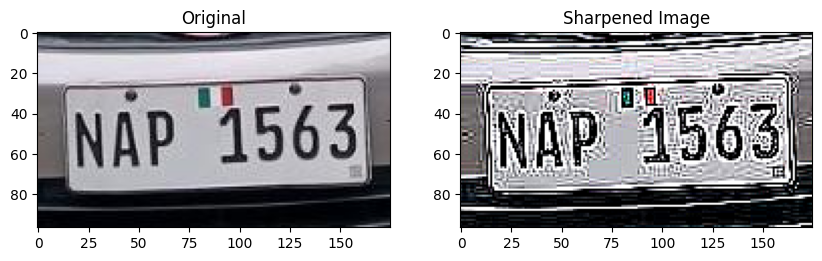

True

In [26]:
# Image Sharpening

# Load image
image = cv2.imread('cropped_license_plate.jpg')

# Convert the image from BGR (OpenCV default) to RGB (for Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Sharpening kernel
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

# Apply sharpening
sharpened = cv2.filter2D(image_rgb, -1, kernel_sharpening)

# Display the images using Matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original')

# Sharpened Image
plt.subplot(1, 2, 2)
plt.imshow(sharpened)
plt.title('Sharpened Image')

# Show the plot
plt.show()

cv2.imwrite('sharpened.jpg', sharpened)

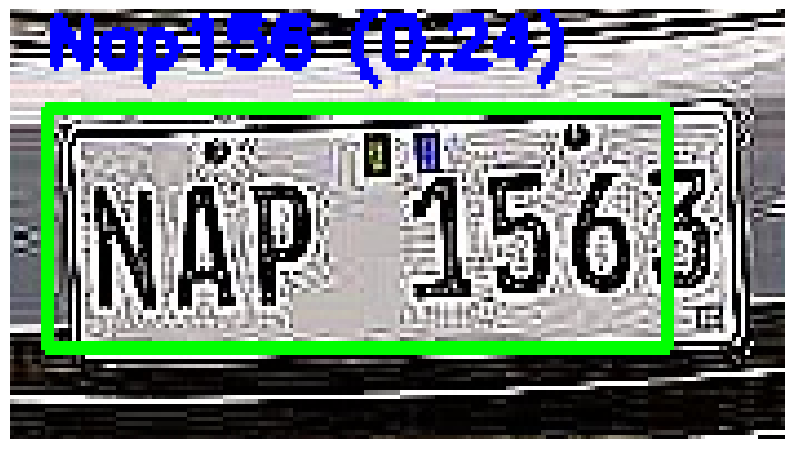

Detected Alphanumeric Text: Nap156, Confidence: 0.24, Bounding Box: [[8, 22], [148, 22], [148, 76], [8, 76]]


In [41]:
# Load your cropped image
license_image = cv2.imread('sharpened.jpg')

# Initialize the EasyOCR reader (specify the language, e.g., 'en' for English)
reader = easyocr.Reader(['en'])

# Perform OCR on the image directly without unnecessary color conversions
result = reader.readtext(license_image)

# Use matplotlib to display the image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Convert to RGB just for displaying in matplotlib
plt.axis('off')  # Turn off axis labels

# Check if any text was detected
if len(result) == 0:
    print("No text detected in the image.")
else:
    # Draw bounding boxes, text, and confidence scores on the original image
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters
        text = re.sub(r'[^A-Za-z0-9]', '', text)

        # Get the coordinates of the bounding box
        top_left = tuple([int(val) for val in bbox[0]])
        bottom_right = tuple([int(val) for val in bbox[2]])

        # Draw the bounding box
        cv2.rectangle(license_image, top_left, bottom_right, (0, 255, 0), 2)

        # Prepare the label with filtered text and confidence score
        label = f"{text} ({prob:.2f})"

        # Put the detected text and confidence on the image
        cv2.putText(license_image, label, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the updated image with bounding boxes and labels
    plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Update image display after drawing on it

plt.show()

# Print out the detected alphanumeric text, bounding box coordinates, and confidence level if any text is detected
if len(result) > 0:
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters for display
        text = re.sub(r'[^A-Za-z0-9]', '', text)
        print(f"Detected Alphanumeric Text: {text}, Confidence: {prob:.2f}, Bounding Box: {bbox}")


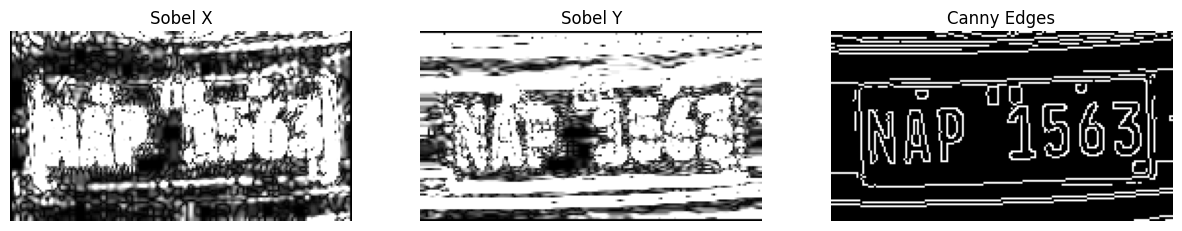

True

In [28]:
# Edge Detection

# Load image
image = cv2.imread('cropped_license_plate.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sobel edge detection
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # Horizontal edges
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)  # Vertical edges

# Convert to uint8 (for display)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Display the images using Matplotlib
plt.figure(figsize=(15, 5))

# Sobel X
plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

# Sobel Y
plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

# Canny Edges
plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

# Show the plot
plt.show()

cv2.imwrite('sobelx.jpg', sobel_x)
cv2.imwrite('sobely.jpg', sobel_y)
cv2.imwrite('canny.jpg', edges)


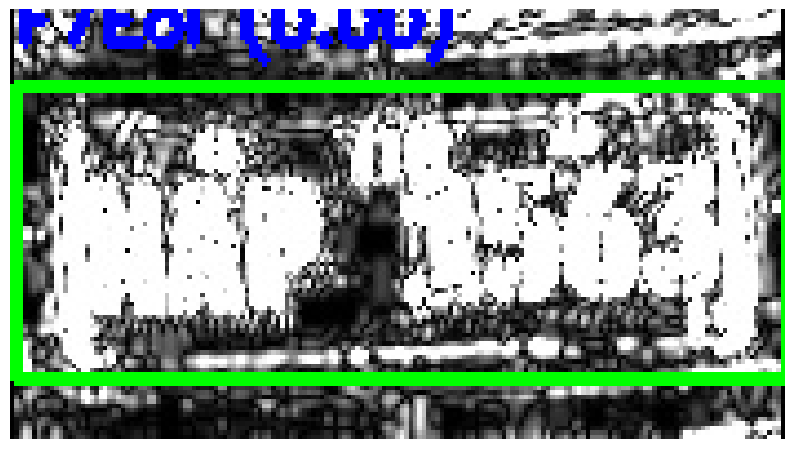

Detected Alphanumeric Text: F7Eol, Confidence: 0.00, Bounding Box: [[1, 17], [175, 17], [175, 83], [1, 83]]


In [42]:
# Load your cropped image
license_image = cv2.imread('sobelx.jpg')

# Initialize the EasyOCR reader (specify the language, e.g., 'en' for English)
reader = easyocr.Reader(['en'])

# Perform OCR on the image directly without unnecessary color conversions
result = reader.readtext(license_image)

# Use matplotlib to display the image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Convert to RGB just for displaying in matplotlib
plt.axis('off')  # Turn off axis labels

# Check if any text was detected
if len(result) == 0:
    print("No text detected in the image.")
else:
    # Draw bounding boxes, text, and confidence scores on the original image
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters
        text = re.sub(r'[^A-Za-z0-9]', '', text)

        # Get the coordinates of the bounding box
        top_left = tuple([int(val) for val in bbox[0]])
        bottom_right = tuple([int(val) for val in bbox[2]])

        # Draw the bounding box
        cv2.rectangle(license_image, top_left, bottom_right, (0, 255, 0), 2)

        # Prepare the label with filtered text and confidence score
        label = f"{text} ({prob:.2f})"

        # Put the detected text and confidence on the image
        cv2.putText(license_image, label, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the updated image with bounding boxes and labels
    plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Update image display after drawing on it

plt.show()

# Print out the detected alphanumeric text, bounding box coordinates, and confidence level if any text is detected
if len(result) > 0:
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters for display
        text = re.sub(r'[^A-Za-z0-9]', '', text)
        print(f"Detected Alphanumeric Text: {text}, Confidence: {prob:.2f}, Bounding Box: {bbox}")


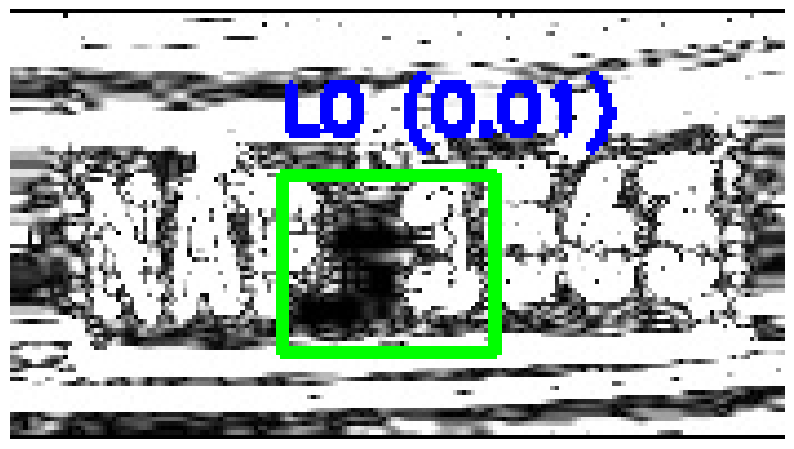

Detected Alphanumeric Text: L0, Confidence: 0.01, Bounding Box: [[61, 37], [109, 37], [109, 77], [61, 77]]


In [43]:
# Load your cropped image
license_image = cv2.imread('sobely.jpg')

# Initialize the EasyOCR reader (specify the language, e.g., 'en' for English)
reader = easyocr.Reader(['en'])

# Perform OCR on the image directly without unnecessary color conversions
result = reader.readtext(license_image)

# Use matplotlib to display the image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Convert to RGB just for displaying in matplotlib
plt.axis('off')  # Turn off axis labels

# Check if any text was detected
if len(result) == 0:
    print("No text detected in the image.")
else:
    # Draw bounding boxes, text, and confidence scores on the original image
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters
        text = re.sub(r'[^A-Za-z0-9]', '', text)

        # Get the coordinates of the bounding box
        top_left = tuple([int(val) for val in bbox[0]])
        bottom_right = tuple([int(val) for val in bbox[2]])

        # Draw the bounding box
        cv2.rectangle(license_image, top_left, bottom_right, (0, 255, 0), 2)

        # Prepare the label with filtered text and confidence score
        label = f"{text} ({prob:.2f})"

        # Put the detected text and confidence on the image
        cv2.putText(license_image, label, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the updated image with bounding boxes and labels
    plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Update image display after drawing on it

plt.show()

# Print out the detected alphanumeric text, bounding box coordinates, and confidence level if any text is detected
if len(result) > 0:
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters for display
        text = re.sub(r'[^A-Za-z0-9]', '', text)
        print(f"Detected Alphanumeric Text: {text}, Confidence: {prob:.2f}, Bounding Box: {bbox}")


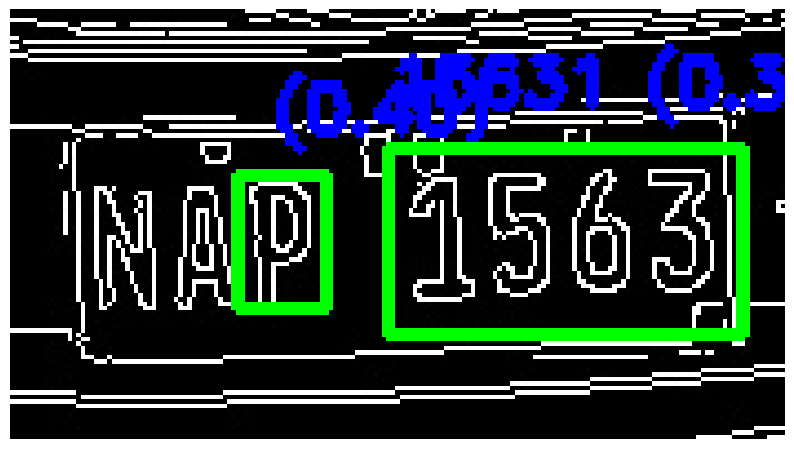

Detected Alphanumeric Text: , Confidence: 0.40, Bounding Box: [[51, 37], [71, 37], [71, 67], [51, 67]]
Detected Alphanumeric Text: 15631, Confidence: 0.39, Bounding Box: [[85, 31], [165, 31], [165, 73], [85, 73]]


In [44]:
# Load your cropped image
license_image = cv2.imread('canny.jpg')

# Initialize the EasyOCR reader (specify the language, e.g., 'en' for English)
reader = easyocr.Reader(['en'])

# Perform OCR on the image directly without unnecessary color conversions
result = reader.readtext(license_image)

# Use matplotlib to display the image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Convert to RGB just for displaying in matplotlib
plt.axis('off')  # Turn off axis labels

# Check if any text was detected
if len(result) == 0:
    print("No text detected in the image.")
else:
    # Draw bounding boxes, text, and confidence scores on the original image
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters
        text = re.sub(r'[^A-Za-z0-9]', '', text)

        # Get the coordinates of the bounding box
        top_left = tuple([int(val) for val in bbox[0]])
        bottom_right = tuple([int(val) for val in bbox[2]])

        # Draw the bounding box
        cv2.rectangle(license_image, top_left, bottom_right, (0, 255, 0), 2)

        # Prepare the label with filtered text and confidence score
        label = f"{text} ({prob:.2f})"

        # Put the detected text and confidence on the image
        cv2.putText(license_image, label, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the updated image with bounding boxes and labels
    plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Update image display after drawing on it

plt.show()

# Print out the detected alphanumeric text, bounding box coordinates, and confidence level if any text is detected
if len(result) > 0:
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters for display
        text = re.sub(r'[^A-Za-z0-9]', '', text)
        print(f"Detected Alphanumeric Text: {text}, Confidence: {prob:.2f}, Bounding Box: {bbox}")


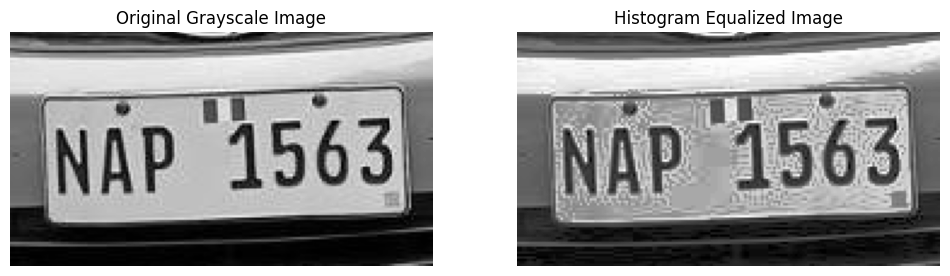

True

In [32]:
# Histogram Equalization

# Load the image
image = cv2.imread('cropped_license_plate.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Display results using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()

cv2.imwrite('gray.jpg', gray_image)
cv2.imwrite('equalized.jpg', equalized_image)


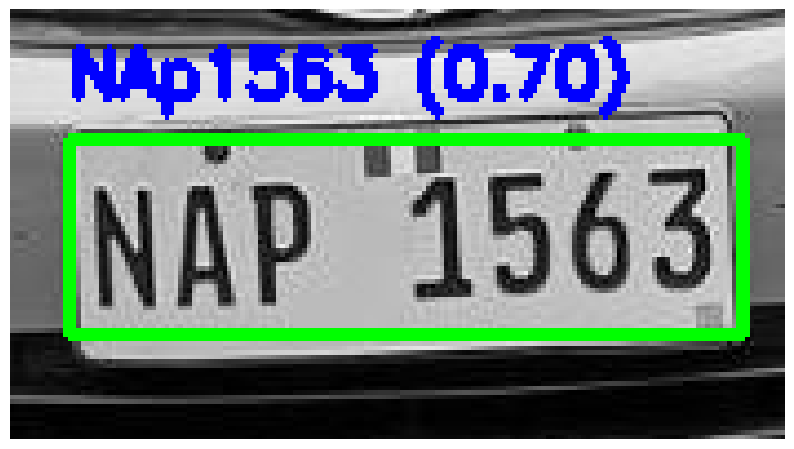

Detected Alphanumeric Text: NAp1563, Confidence: 0.70, Bounding Box: [[13, 29], [165, 29], [165, 73], [13, 73]]


In [45]:
# Load your cropped image
license_image = cv2.imread('gray.jpg')

# Initialize the EasyOCR reader (specify the language, e.g., 'en' for English)
reader = easyocr.Reader(['en'])

# Perform OCR on the image directly without unnecessary color conversions
result = reader.readtext(license_image)

# Use matplotlib to display the image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Convert to RGB just for displaying in matplotlib
plt.axis('off')  # Turn off axis labels

# Check if any text was detected
if len(result) == 0:
    print("No text detected in the image.")
else:
    # Draw bounding boxes, text, and confidence scores on the original image
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters
        text = re.sub(r'[^A-Za-z0-9]', '', text)

        # Get the coordinates of the bounding box
        top_left = tuple([int(val) for val in bbox[0]])
        bottom_right = tuple([int(val) for val in bbox[2]])

        # Draw the bounding box
        cv2.rectangle(license_image, top_left, bottom_right, (0, 255, 0), 2)

        # Prepare the label with filtered text and confidence score
        label = f"{text} ({prob:.2f})"

        # Put the detected text and confidence on the image
        cv2.putText(license_image, label, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the updated image with bounding boxes and labels
    plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Update image display after drawing on it

plt.show()

# Print out the detected alphanumeric text, bounding box coordinates, and confidence level if any text is detected
if len(result) > 0:
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters for display
        text = re.sub(r'[^A-Za-z0-9]', '', text)
        print(f"Detected Alphanumeric Text: {text}, Confidence: {prob:.2f}, Bounding Box: {bbox}")

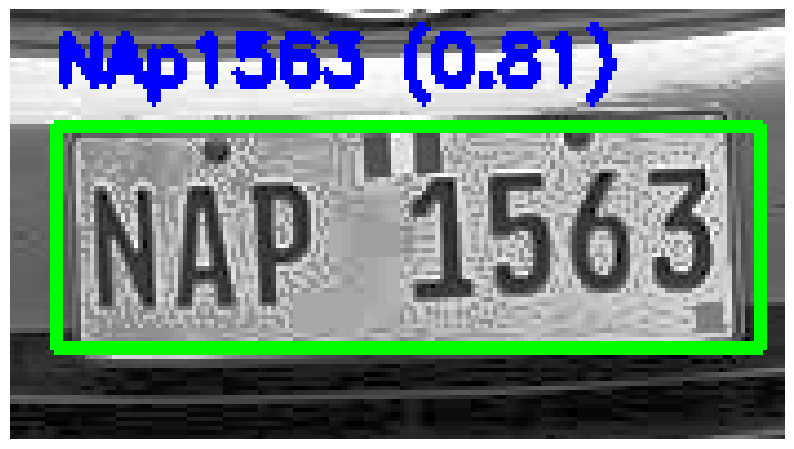

Detected Alphanumeric Text: NAp1563, Confidence: 0.81, Bounding Box: [[10, 26], [169, 26], [169, 76], [10, 76]]


In [46]:
# Load your cropped image
license_image = cv2.imread('equalized.jpg')

# Initialize the EasyOCR reader (specify the language, e.g., 'en' for English)
reader = easyocr.Reader(['en'])

# Perform OCR on the image directly without unnecessary color conversions
result = reader.readtext(license_image)

# Use matplotlib to display the image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Convert to RGB just for displaying in matplotlib
plt.axis('off')  # Turn off axis labels

# Check if any text was detected
if len(result) == 0:
    print("No text detected in the image.")
else:
    # Draw bounding boxes, text, and confidence scores on the original image
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters
        text = re.sub(r'[^A-Za-z0-9]', '', text)

        # Get the coordinates of the bounding box
        top_left = tuple([int(val) for val in bbox[0]])
        bottom_right = tuple([int(val) for val in bbox[2]])

        # Draw the bounding box
        cv2.rectangle(license_image, top_left, bottom_right, (0, 255, 0), 2)

        # Prepare the label with filtered text and confidence score
        label = f"{text} ({prob:.2f})"

        # Put the detected text and confidence on the image
        cv2.putText(license_image, label, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the updated image with bounding boxes and labels
    plt.imshow(cv2.cvtColor(license_image, cv2.COLOR_BGR2RGB))  # Update image display after drawing on it

plt.show()

# Print out the detected alphanumeric text, bounding box coordinates, and confidence level if any text is detected
if len(result) > 0:
    for (bbox, text, prob) in result:
        # Filter the text to keep only alphanumeric characters for display
        text = re.sub(r'[^A-Za-z0-9]', '', text)
        print(f"Detected Alphanumeric Text: {text}, Confidence: {prob:.2f}, Bounding Box: {bbox}")